In [106]:
%pip install opencv-python
#Importing opencv
import cv2
#To name our images uniquely
import uuid
#to import operating system
import os
#Importing time
import time
%pip install keras
#We gonna label around images
#!pip list
%pip install --upgrade pyqt5 lxml
%pip install echo

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


In [15]:
#Defining images to collect
labels=['b.y','e.brown','e.other','g.y','n.blunt','n.sharp','s.black','s.white']
#Number of images for each module mentioned above
number_imgs=8

In [16]:
#Setting up folders
#Tensorflow->workspace->images->collections
import os
image_path=os.path.join('Tensorflow1','workspace','images','collectedimages')
print(image_path)


Tensorflow1\workspace\images\collectedimages


In [17]:
#To make it compatible on various devices:
if not os.path.exists(image_path):
    if os.name=='posix':
        !mkdir -p {image_path}
    if os.name=='nt':
        !mkdir {image_path}
#Iterating labels and inserting one by one to folder
for label in labels:
    path=os.path.join(image_path,label)
    if not os.path.exists(path):
        !mkdir {path}

In [19]:
#Creating a new image for storing label image
label_path=os.path.join('Tensorflow1','labelimg')
#cloning model for labelimg
if not os.path.exists(label_path):
    !mkdir {label_path}

In [20]:
#loading labelimg directory
!cd {label_path} && pyrcc5 -o libs/resources.py resources.qrc

In [98]:
#opening directly
!cd {label_path} && python labelImg.py

In [21]:
#To check if the images are of the correct extension as webp and gif and other formats than jpg and png wont be accepted
from pathlib import Path
import imghdr
c=0
data_dir = "G:\\ML_facereg\\cloned\\Tensorflow1\\workspace\\images\\collectedimages\\train1"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["jpeg"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        c=c+1
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")


In [1]:
#Setting up paths
import echo
model_name='my_model'
pretrained_model_name='ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_model_name_url='http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
tf_record_script_name='tf_record_generate.py'
label_map_name='label_map.pbtxt'
#Mentioning all paths
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow1', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow1','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow1','models','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow1', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow1', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow1', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow1', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow1', 'workspace','models',model_name), 
    'OUTPUT_PATH': os.path.join('Tensorflow1', 'workspace','models',model_name, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow1', 'workspace','models',model_name, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow1', 'workspace','models',model_name, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow1','protoc')
 }
files={
    'PIPELINE_CONFIG':os.path.join('Tensorflow1', 'workspace','models', model_name, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], tf_record_script_name), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'],label_map_name)
}
#creating directeries
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}
#creating files
for path in files.values():
    if not os.path.exists(path):
        !echo > {path}
open(files['LABELMAP'], "w").close()

Tensorflow1\workspace\models\my_model\pipeline.config


In [10]:
#Downloading pretained tensorzoo model from tensorflow
#To pull down module form tensormodel zoo
if os.name=='nt':
    %pip install wget
    import wget

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


In [140]:
#To train the model we need to clone the traine model set from tensormodelzoo
!git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

fatal: destination path 'Tensorflow1\models\models' already exists and is not an empty directory.


In [11]:
#Installing tensorflow object detection
#We need to install protoc for object detection which is a set of protocol bufferes for object detection
import wget
import numpy

url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Tensorflow/models/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/models/research/slim && pip install -e .

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detecti

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
No local packages or working download links found for tensorflow~=2.8.0
error: Could not find suitable distribution for Requirement.parse('tensorflow~=2.8.0')


Obtaining file:///G:/ML_facereg/cloned/Tensorflow/models/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


You should consider upgrading via the 'G:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.4: g:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-05-24 20:34:58.269679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-24 20:35:04.216693: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1369 MB memory:  -> device: 0, name: NVIDIA GeForce MX130, pci bus id: 0000:02:00.0, compute capability: 5.0
g:\ML_facereg\cloned\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1102: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building exper

In [27]:
import object_detection
import tensorflow as tf

In [6]:
#MEntioning labels to be written in the label map
labels=[{'name':'b.y','id':1},{'name':'e.brown','id':2},{'name':'e.other','id':3},{'name':'g.y','id':4},{'name':'n.blunt','id':5},{'name':'n.sharp','id':6},{'name':'s.black','id':7},{'name':'s.white','id':8}]
#opening file
with open(files['LABELMAP'],'w') as f:
    for label in labels:
        f.write("item { \n")
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [16]:
#cloning tfgenerate python file to generate tf records
!git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

fatal: destination path 'Tensorflow1\scripts' already exists and is not an empty directory.


In [50]:
# here we have tested and trained our images and created a report
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train1')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train1.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test1')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test1.record')}

Successfully created the TFRecord file: Tensorflow1\workspace\annotations\train1.record
Successfully created the TFRecord file: Tensorflow1\workspace\annotations\test1.record


In [51]:
#pipeline is the one that determines the architecture of the program
#We need to copy the pipeine file to the ssdmobinet one which is the pretrained model
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], pretrained_model_name, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [3]:
#change the number of classes in the pipeline
#Now we write the updated info to pipeline where input as test and output as train and the following code access the pipeline by opening the file
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
#getting configurations from config file
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 8
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [4]:
#Reading the pipeline file
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [7]:
#Changing the configurations
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], pretrained_model_name, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train1.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test1.record')]

In [8]:
#Writng the changes to pipeline file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [5]:
#Training the model 
#TO do : Open git bash 
#Upto here run the ipynb
#In this Open git bash
#Type cd "G:\ML_facereg\cloned\TFODCourse" and press enter
#Type source "tfod/Scripts/activate"
#The above will activate the venv environment
#now type cd "G:\ML_facereg\cloned"
#Now type  python "Tensorflow1\models\models\research\object_detection\model_main_tf2.py" --model_dir="Tensorflow1\workspace\models\my_model" --pipeline_config_path="Tensorflow1\workspace\models\my_model\pipeline.config" --num_train_steps=2000
#The above will train the model for 2000 steps at each time updating the accuracy
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
print(command)

python Tensorflow1\models\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow1\workspace\models\my_model --pipeline_config_path=Tensorflow1\workspace\models\my_model\pipeline.config --num_train_steps=2000


In [6]:
import tensorflow
#Now we evaluate the model for TP(True postive) TN(True Negative) FP(False postive) FN(False negative)
#Keep the same environment as above cell
#Type "python Tensorflow1\models\models\research\object_detection\model_main_tf2.py" --model_dir="Tensorflow1\workspace\models\my_model" --pipeline_config_path="Tensorflow1\workspace\models\my_model\pipeline.config" --checkpoint_dir="Tensorflow1\workspace\models\my_model"
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
print(command)

python Tensorflow1\models\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow1\workspace\models\my_model --pipeline_config_path=Tensorflow1\workspace\models\my_model\pipeline.config --checkpoint_dir=Tensorflow1\workspace\models\my_model


In [9]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()
#Model prediction
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

100


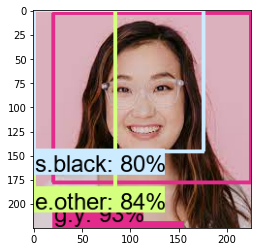

In [12]:
#To detect form the image
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
#Mention the image to be predicted below
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train1', '4.2.jpg') #G:\ML_facereg\cloned\Tensorflow\workspace\images\train1\4.2.jpg
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
print(num_detections)
# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [68]:
#Realtime detection from webcams
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [128]:
%pip install keras
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
#from tensorflow.keras.models import Sequential


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'g:\ML_facereg\cloned\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


In [129]:
#Creating datapath
import pathlib
data_dir1='G:\\ML_facereg\\cloned\\Tensorflow1\\workspace\images\\collectedimages1'
data_dir1 = pathlib.Path(data_dir1)


In [131]:
#Mentioning the parameters
batch_size = 32
img_height = 180
img_width = 180

In [132]:
#Creation into train and validation set
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir1,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir1,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 615 files belonging to 8 classes.
Using 492 files for training.
Found 615 files belonging to 8 classes.
Using 123 files for validation.


In [135]:
#Printing the classnames of the training set
class_names = train_ds.class_names
print(class_names)
train_ds

['b.y', 'e.brown', 'e.other', 'g.y', 'n.blunt', 'n.sharp', 's.black', 's.white']


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

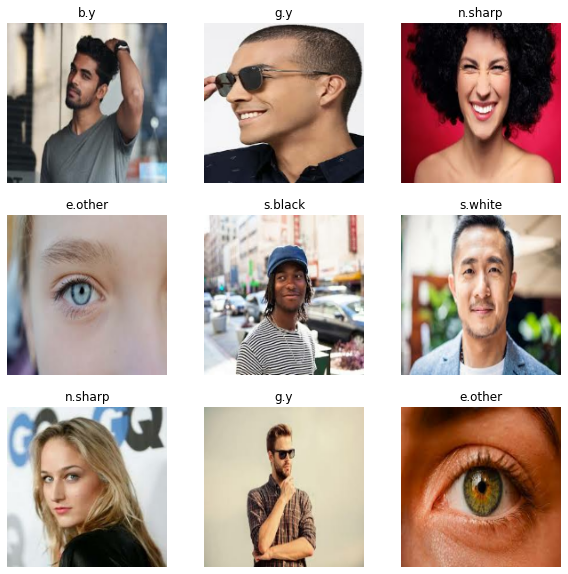

In [134]:
#Make sure it plots correctly
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [30]:
'''Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) 
of the training and the time it takes to extract the data.
The tf.data API provides the tf.data.Dataset.prefetch transformation. 
It can be used to decouple the time when data is produced from the time when data is consumed. 
In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested. The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. You could either manually tune this value, or set it to tf.data.AUTOTUNE, 
which will prompt the tf.data runtime to tune the value dynamically at runtime.'''
AUTOTUNE = tf.data.AUTOTUNE

train_ds1 = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
'''Rescaling the images is part of data preprocessing, also rescaling images is called image normalization, this process is useful for providing a uniform scale for the dataset or numerical values you are using before building your model'''
normalization_layer = layers.Rescaling(1./255)

In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [33]:
num_classes = len(class_names)
'''Create the model The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a `relu` activation function.
This model has not been tuned for high accuracy, the goal of this tutorial is to show a standard approach.
'''
model = keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
'''Compile the model For this tutorial, choose the `optimizers.Adam` optimizer and `losses.SparseCategoricalCrossentropy` loss function.
To view training and validation accuracy for each training epoch, pass the `metrics` argument.'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [36]:
#Train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 4s 230ms/step - loss: 2.1870 - accuracy: 0.1280 - val_loss: 2.0495 - val_accuracy: 0.2033
Epoch 2/10
16/16 [==============================] - 3s 155ms/step - loss: 1.9732 - accuracy: 0.2053 - val_loss: 1.8510 - val_accuracy: 0.2439
Epoch 3/10
16/16 [==============================] - 3s 157ms/step - loss: 1.6944 - accuracy: 0.3577 - val_loss: 1.8481 - val_accuracy: 0.3496
Epoch 4/10
16/16 [==============================] - 3s 157ms/step - loss: 1.3732 - accuracy: 0.4919 - val_loss: 1.6965 - val_accuracy: 0.4228
Epoch 5/10
16/16 [==============================] - 3s 157ms/step - loss: 1.0713 - accuracy: 0.6077 - val_loss: 1.7158 - val_accuracy: 0.4065
Epoch 6/10
16/16 [==============================] - 3s 156ms/step - loss: 0.7891 - accuracy: 0.7317 - val_loss: 1.9226 - val_accuracy: 0.4390
Epoch 7/10
16/16 [==============================] - 3s 155ms/step - loss: 0.5429 - accuracy: 0.8252 - val_loss: 2.3795 - val_accuracy: 0.4390
Epoch 

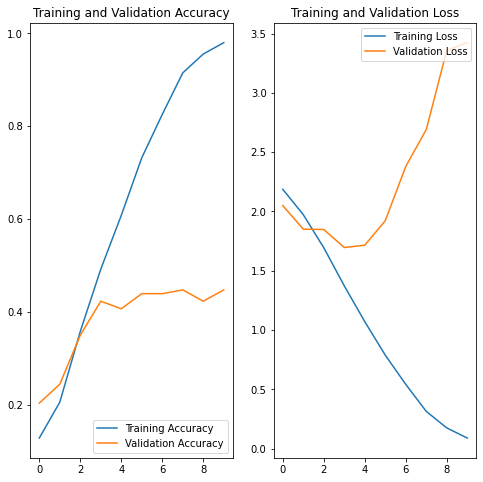

In [37]:
#Visualize training results Create plots of loss and accuracy on the training and validation sets.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
'''As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 60% accuracy on the validation set.
Let's look at what went wrong and try to increase the overall performance of the model.
Overfitting In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process.
Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting]
When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.
There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *Dropout* to your model.
Data augmentation Overfitting generally occurs when there are a small number of training examples.
[Data augmentation] takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images.
This helps expose the model to more aspects of the data and generalize better.
You will implement data augmentation using experimental [Keras Preprocessing Layers] . These can be included inside your model like other layers, and run on the GPU.'''
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

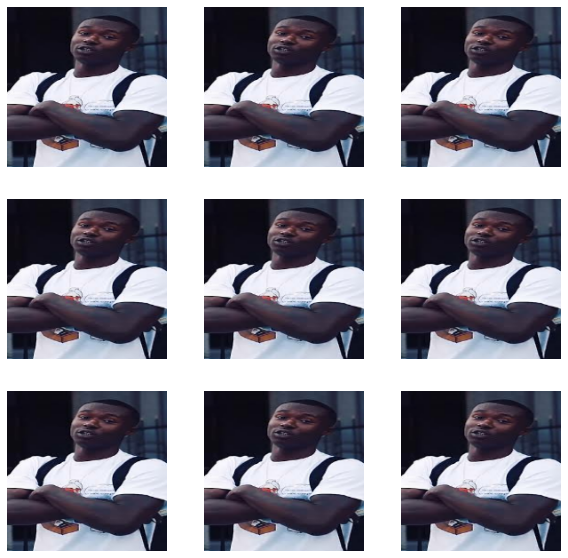

In [40]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [41]:
#For better accuracy we do this again
'''You will use data augmentation to train a model in a moment.


Dropout Another technique to reduce overfitting is to introduce [Dropout] to the network, a form of *regularization*.


When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process.


Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.


Let's create a new neural network using `layers.Dropout`, then train it using augmented images.'''
model = keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [42]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [43]:
#Train the model
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
16/16 [==============================] - 18s 851ms/step - loss: 2.2194 - accuracy: 0.1341 - val_loss: 2.0470 - val_accuracy: 0.2033
Epoch 2/15
16/16 [==============================] - 14s 833ms/step - loss: 2.0280 - accuracy: 0.1687 - val_loss: 1.9897 - val_accuracy: 0.1951
Epoch 3/15
16/16 [==============================] - 14s 847ms/step - loss: 1.9319 - accuracy: 0.2419 - val_loss: 1.8906 - val_accuracy: 0.2764
Epoch 4/15
16/16 [==============================] - 14s 853ms/step - loss: 1.7951 - accuracy: 0.3130 - val_loss: 2.0681 - val_accuracy: 0.2520
Epoch 5/15
16/16 [==============================] - 14s 855ms/step - loss: 1.6655 - accuracy: 0.3638 - val_loss: 1.8841 - val_accuracy: 0.2602
Epoch 6/15
16/16 [==============================] - 14s 861ms/step - loss: 1.6088 - accuracy: 0.3943 - val_loss: 1.8690 - val_accuracy: 0.3252
Epoch 7/15
16/16 [==============================] - 15s 934ms/step - loss: 1.5208 - accuracy: 0.4309 - val_loss: 1.7433 - val_accuracy: 0.3821

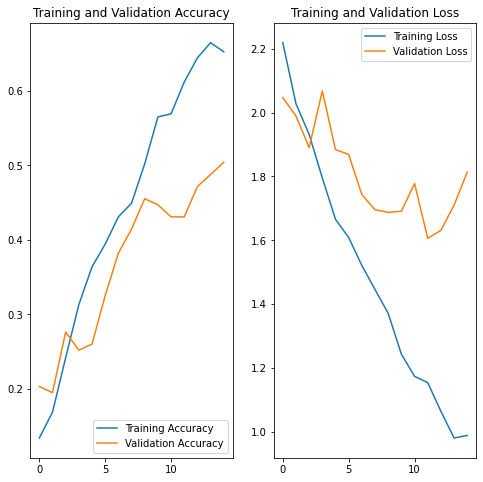

In [44]:
#Visualize training results After applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [4]:
beardyes = []
eyebrown = []
eyeother = []
glassyes=[]
noglasseyes=[]
noseblunt=[]
nosesharp=[]
skinblack=[]
skinwhite=[]
'''Predict on new data Finally, let's use our model to classify an image that wasn't included in the training or validation sets.
Note: Data augmentation and Dropout layers are inactive at inference time.'''
def argpass(s):
    pathss = "G:\\ML_facereg\\cloned\\Tensorflow1\\workspace\\images\\all\\{}".format(s)

    img = tf.keras.utils.load_img(
        pathss, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    score=score*100
    c=0
    while(c!=9):
        if(c==0):
            if(score[c]>20):
                beardyes.append(s)
                c=c+1
        if(c==1):
            if(score[c]>score[c+1]):
                eyebrown.append(s)
                c=c+2
            else:
                eyeother.append(s)
                c=c+2
        if(c==3):
            if(score[c]>20):
                glassyes.append(s)
            else:
                noglasseyes.append(s)
            c=c+1
        if(c==4):
            if(score[c]>score[c+1]):
                noseblunt.append(s)
            else:
                nosesharp.append(s)
            c=c+2
        if(c==6):
            if(score[c]>score[c+1]):
                skinblack.append(s)
            else:
                skinwhite.append(s)
            c=c+2
        
    #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], np.max(score)))